In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from pprint import pprint
import random
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

In [2]:
# prep data
num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [5]:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')

    print(f'Test accuracy: {accuracy:.3}')

metrics: 0.9763 0.0744 0.9653 0.1302


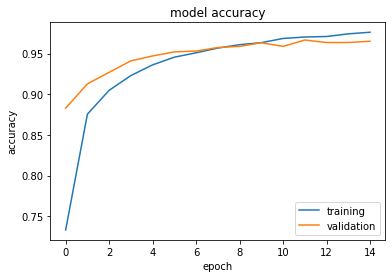

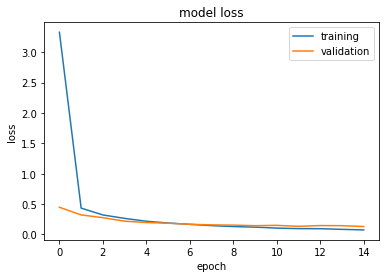

Test loss: 0.121
Test accuracy: 0.968


In [11]:
# model and train
model = Sequential()

model.add(Input(shape=(image_size,)))
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.02))
model.add(Dense(units=64))
model.add(LeakyReLU(alpha=0.02))
model.add(Dense(units=32))
model.add(Dropout(rate=0.15))
model.add(Dense(units=num_classes, activation='softmax'))


model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels,
  batch_size=128,
  epochs=15,
  verbose=0,
  validation_split=.2)

print('metrics: {:.4f} {:.4f} {:.4f} {:.4f}'.format(history.history['accuracy'][-1],
history.history['loss'][-1],
history.history['val_accuracy'][-1],
history.history['val_loss'][-1]))

plot_training_history(history, model)

Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 5.9674 - accuracy: 0.8830 - val_loss: 1.4741 - val_accuracy: 0.9268
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.8550 - accuracy: 0.9431 - val_loss: 0.8329 - val_accuracy: 0.9398
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.9564 - val_loss: 0.6392 - val_accuracy: 0.9431
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2622 - accuracy: 0.9668 - val_loss: 0.5987 - val_accuracy: 0.9500
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9697 - val_loss: 0.5493 - val_accuracy: 0.9518
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9732 - val_loss: 0.5722 - val_accuracy: 0.9530
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9739 - val_loss: 0.5942 - val_accuracy: 0.9538
Epoch 

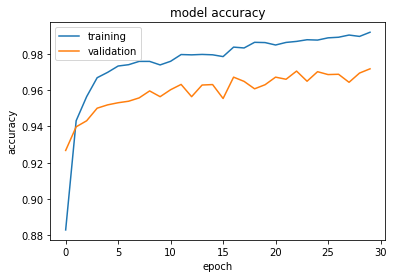

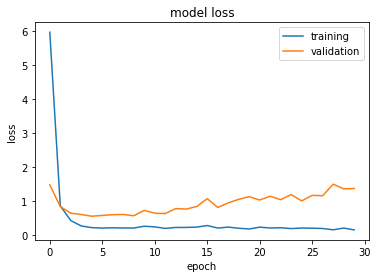

Test loss: 1.2
Test accuracy: 0.97


In [19]:
# model and train
model = Sequential()

model.add(Input(shape=(image_size,)))
# model.add(Dropout(rate=0.18753231948179944))
model.add(Dense(units=256))
model.add(LeakyReLU(alpha=0.04345847316957918))
model.add(Dense(units=num_classes, activation='softmax'))


model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels,
  batch_size=128,
  epochs=30,
  verbose=1,
  validation_split=.2)

print('metrics: {:.4f} {:.4f} {:.4f} {:.4f}'.format(history.history['accuracy'][-1],
history.history['loss'][-1],
history.history['val_accuracy'][-1],
history.history['val_loss'][-1]))

plot_training_history(history, model)